In [1]:
#决策树
#决策树的建立过程：特征选择：选择有较强分类能力的特征
                #决策树生成：根据选择的特征生成决策树
                #决策树也容易过拟合，采用剪枝方法缓解

In [12]:
#泰坦尼克号乘客生存预测分类
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier#决策树
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Age         891 non-null    float64
 2   Sex_female  891 non-null    bool   
 3   Sex_male    891 non-null    bool   
dtypes: bool(2), float64(1), int64(1)
memory usage: 15.8 KB
分类评估报告:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       115
           1       0.74      0.61      0.67        64

    accuracy                           0.78       179
   macro avg       0.77      0.74      0.75       179
weighted avg       0.78      0.78      0.78       179



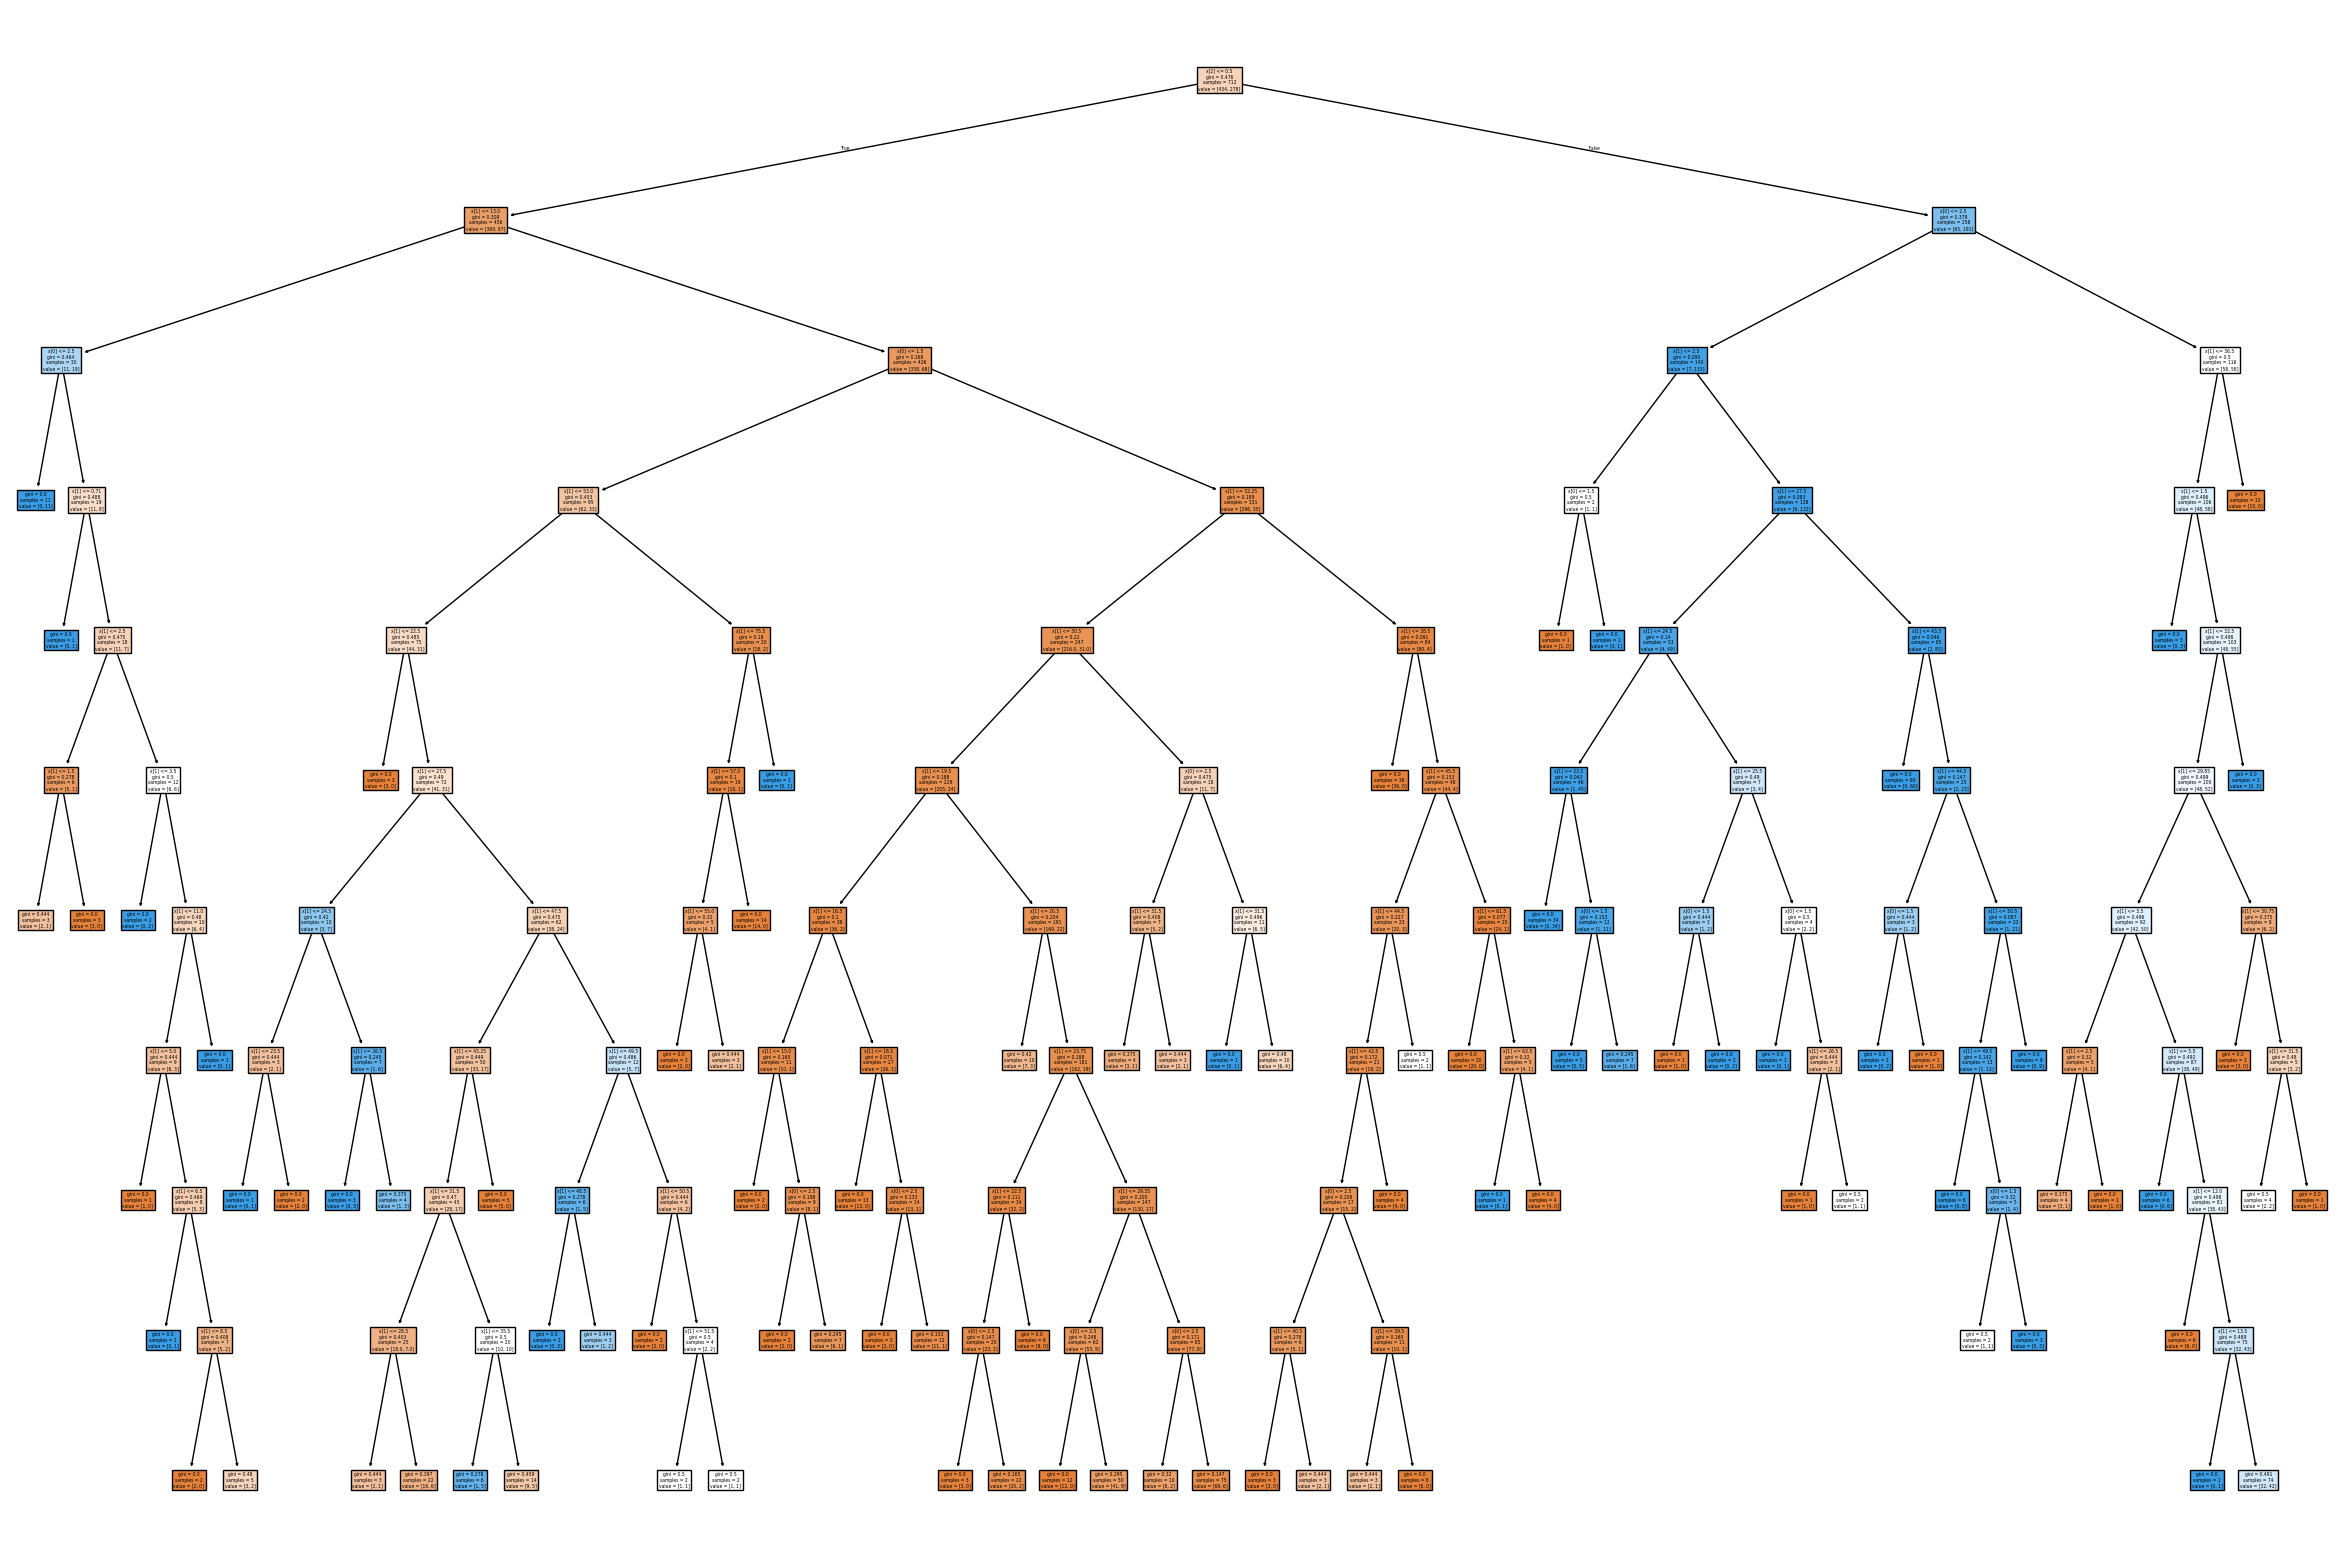

In [13]:
def dm01():
    #数据读入
    data = pd.read_csv('./titanic_train.csv')
    #data.info()
    #数据预处理
    #提取特征
    x = data[['Pclass', 'Sex', 'Age']]
    y = data['Survived']
    #数据填充 age列有缺失 我们用该列的平均值进行填充
    #数据复制 进行填充
    x = x.copy()
    x['Age'] = x['Age'].fillna(x['Age'].mean())
    #x.info()
    #将性别变成onehot
    x = pd.get_dummies(x,columns=['Sex'])
    x.info()
    #划分数据集
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=23)
    #模型训练
    estimator = DecisionTreeClassifier(max_depth=10)#最大十层绘制的树
    estimator.fit(x_train,y_train)
    #模型预测
    y_pred = estimator.predict(x_test)
    #模型评估
    print(f'分类评估报告:\n{classification_report(y_test,y_pred)}')
    #绘制决策树图
    plt.figure(figsize=(30,20))
    #模型 是否颜色填充 最大层数
    plot_tree(estimator,filled=True,max_depth = 10)
    plt.savefig('./泰坦尼克号.png')
    plt.show()
dm01()